In [247]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings("ignore")

# Basic
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import random
from tqdm.autonotebook import tqdm
import string
from collections import Counter
import re

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100) 

In [263]:
df = pd.read_excel("Case Prediction Data2.xlsx")

In [264]:
df.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,204977,Efile Acceptance,2017-01-02 05:39:00,2017-01-03 09:03:00,Web,Medium,Tax Preparation,Efile,Platinum,We transmitted a Michigan return still have no...,Compliance,Returns / Reports,NaN,NaN,US.MI,Answer exists KB,041324813494120,How to understand the Transmission Monitor
1,204979,Oregon STAT help: Previous Case 203787 Client ...,2017-01-02 09:03:00,2017-01-04 16:56:00,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client ...,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN
2,204980,Data map incorrectly pulling in values,2017-01-02 11:25:00,2017-01-03 15:48:00,Web,Medium,Tax Preparation,Question / How To,Silver,Corptax Office Import - Credit Account imports...,Office - Excel Add-In,Import / Export,NaN,NaN,US,Answer exists KB,041414821333274,Corptax® Office - How to place an IF formula i...
3,204981,The New Corptax Connect Website is not properl...,2017-01-02 12:06:00,2017-01-03 09:26:00,Web,High,Tax Preparation,Problem / Error,Silver,Searches can't be performed on the new system....,Websites,Connections (https://connect.corptax.com),Error Message,NaN,NaN,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wron...
4,204986,LD400 is not reflecting a temporary adjustment,2017-01-03 07:17:00,2017-01-05 08:21:00,E-mail,Medium,Tax Preparation,Problem / Error,Platinum,LD400 is not reflecting a temporary adjustment,Compliance,Returns / Reports,NaN,NaN,US,Answer exists KB,041622907012748,Adjustments do not flow to LD400 workpaper and...


In [265]:
df.Product.value_counts()

Compliance                             110216
International (US)                      28604
Websites                                16459
Provision                                9918
Partnership / S Corp / Pass-Through      9069
Sales Tax                                4338
Office - Excel Add-In                    3799
Application Hosting                      3440
Other                                     798
Calendar                                  768
Data Exchange Manager                     570
WorkSpace                                 529
ODBC Driver - Corptax                     300
Web Services                              199
Claims                                     57
Name: Product, dtype: int64

In [266]:
#dfc = df[df.Product == "Compliance"]
df['Date Created'] = df['Date Created'].dt.date
df['Date Closed'] = df['Date Closed'].dt.date
df['Date'] = pd.to_datetime(df['Date Created'], errors='coerce')
dfc = df

In [277]:
# Adding a new column which will have the number of tickets per day
newdf = dfc[["Date","Case Number"]]
newdf.drop_duplicates(inplace=True)
newdf = pd.DataFrame(newdf.groupby([newdf["Date"].dt.date]).count()["Case Number"])
newdf = newdf.reset_index()
newdf.index = newdf.Date
newdf

,Date,Case Number
Date,,
2017-01-02,2017-01-02,4
2017-01-03,2017-01-03,84
2017-01-04,2017-01-04,113
2017-01-05,2017-01-05,106
2017-01-06,2017-01-06,87
...,...,...
2022-08-11,2022-08-11,110
2022-08-12,2022-08-12,99
2022-08-13,2022-08-13,16


In [278]:
newdf['Date'] = pd.to_datetime(newdf['Date'], errors='coerce')
newdf = newdf.asfreq('D')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2052 entries, 2017-01-02 to 2022-08-15
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2023 non-null   datetime64[ns]
 1   Case Number  2023 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.1 KB


In [279]:
newdf = newdf.groupby(pd.Grouper(freq="M")).sum()
newdf

,Case Number
Date,
2017-01-31,2206.0
2017-02-28,2377.0
2017-03-31,3326.0
2017-04-30,2186.0
2017-05-31,2581.0
2017-06-30,2916.0
2017-07-31,2453.0
2017-08-31,3755.0
2017-09-30,4100.0


In [280]:
month_newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2017-01-31 to 2022-08-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Case Number  68 non-null     int64
dtypes: int64(1)
memory usage: 3.1 KB


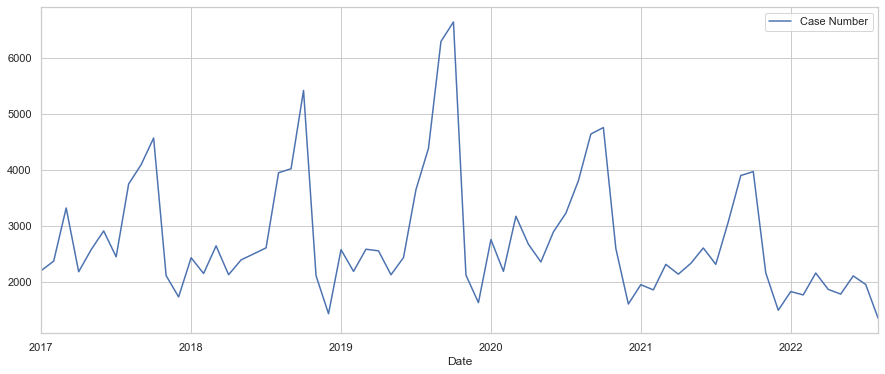

In [281]:
# Plotting number of tickets per day
month_newdf.plot(figsize=(15,6))
plt.show()

In [282]:
import itertools
# Making a list of values for p,d & q
p = d = q = range(0,4)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [283]:
import statsmodels.api as sm
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(month_newdf,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:1264.947424411389
ARIMA(0, 0, 1) - AIC:1200.3638014922315
ARIMA(0, 0, 2) - AIC:1139.4126578130506
ARIMA(0, 0, 3) - AIC:1118.1713611753362
ARIMA(0, 1, 0) - AIC:1106.9933461445976
ARIMA(0, 1, 1) - AIC:1092.4003212081373
ARIMA(0, 1, 2) - AIC:1059.101555066857
ARIMA(0, 1, 3) - AIC:1045.6428612089992
ARIMA(0, 2, 0) - AIC:1136.6806607290232
ARIMA(0, 2, 1) - AIC:1078.636883256966
ARIMA(0, 2, 2) - AIC:1065.7938202821333
ARIMA(0, 2, 3) - AIC:1038.5057364308316
ARIMA(0, 3, 0) - AIC:1183.9539034545514
ARIMA(0, 3, 1) - AIC:1109.6789830822186
ARIMA(0, 3, 2) - AIC:1054.9223768699449
ARIMA(0, 3, 3) - AIC:1053.8296845486504
ARIMA(1, 0, 0) - AIC:1122.5517168367867
ARIMA(1, 0, 1) - AIC:1108.7230330961947
ARIMA(1, 0, 2) - AIC:1077.9755558525644
ARIMA(1, 0, 3) - AIC:1063.3440813378784
ARIMA(1, 1, 0) - AIC:1108.9830362124817
ARIMA(1, 1, 1) - AIC:1082.2092821843398
ARIMA(1, 1, 2) - AIC:1060.9888162140564
ARIMA(1, 1, 3) - AIC:1047.4182722669084
ARIMA(1, 2, 0) - AIC:1128.5433705358196
ARI

In [284]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(month_newdf,order=(3,3,3))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7752      0.408     -1.902      0.057      -1.574       0.024
ar.L2         -0.1904      0.452     -0.421      0.673      -1.076       0.695
ar.L3         -0.0562      0.348     -0.162      0.872      -0.738       0.625
ma.L1         -1.1243      0.324     -3.470      0.001      -1.759      -0.489
ma.L2         -0.7280      0.509     -1.429      0.153      -1.727       0.270
ma.L3          0.8641      0.304      2.843      0.004       0.268       1.460
sigma2      1.373e+06   2.86e-07   4.81e+12      0.000    1.37e+06    1.37e+06


In [285]:
pred = results.get_prediction(start=pd.to_datetime('2022-06-30'),end=pd.to_datetime('2023-05-31'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2022-06-30    1820.0
2022-07-31    2043.0
2022-08-31    1852.0
2022-09-30    1282.0
2022-10-31    1324.0
2022-11-30    1198.0
2022-12-31    1146.0
2023-01-31    1057.0
2023-02-28     986.0
2023-03-31     899.0
2023-04-30     818.0
2023-05-31     729.0
Freq: M, Name: predicted_mean, dtype: float64

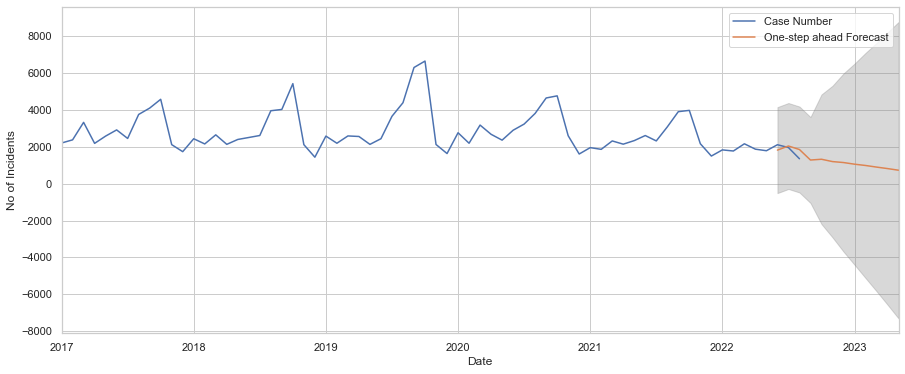

In [286]:
ax = month_newdf.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

# AutoARIMA

In [287]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [288]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(month_newdf)

(0.06864521351350372, True)

In [289]:
len(month_newdf)

68

In [290]:
train = month_newdf[:60]
train

,Case Number
Date,
2017-01-31,2206
2017-02-28,2377
2017-03-31,3326
2017-04-30,2186
2017-05-31,2581
2017-06-30,2916
2017-07-31,2453
2017-08-31,3755
2017-09-30,4100


In [291]:
test = month_newdf[-20:]
test

,Case Number
Date,
2021-01-31,1955
2021-02-28,1862
2021-03-31,2318
2021-04-30,2143
2021-05-31,2336
2021-06-30,2611
2021-07-31,2319
2021-08-31,3079
2021-09-30,3906


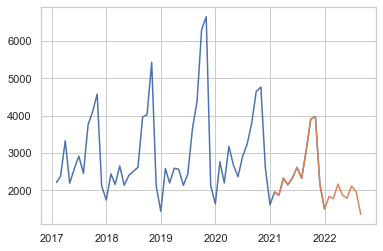

In [292]:
plt.plot(train)
plt.plot(test)

In [293]:
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=765.628, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=755.359, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=755.500, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=764.414, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=754.391, Time=0.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=755.109, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=756.439, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=756.386, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=754.305, Time=0.06 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=755.581, Time=0.10 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=756.262, Time=0.13 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=757.341, Time=0.16 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AI

In [294]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -374.384
Date:                             Fri, 26 Aug 2022   AIC                            752.768
Time:                                     16:01:34   BIC                            756.511
Sample:                                          0   HQIC                           754.183
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5878      0.154      3.827      0.000       0.287       0.889
sigma2      3.461e+05   4.21e+04      8.229      0.000    2.64e+05    4.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                52.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                             1.23
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [243]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Date,
2021-01-31,1947.429164
2021-02-28,1862.000000
2021-03-31,2318.000000
2021-04-30,2143.000000
2021-05-31,2336.000000
2021-06-30,2611.000000
2021-07-31,2319.000000
2021-08-31,3079.000000
2021-09-30,3906.000000


In [ ]:
start=pd.to_datetime('2022-06-30'),end=pd.to_datetime('2023-05-31'),dynamic=False)

In [244]:
arima_model.predict(n_periods = 20)

array([1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ,
       3906.        , 3976.        , 2166.        , 1498.        ,
       1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ])

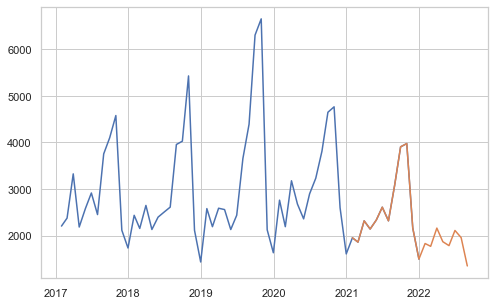

In [245]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")

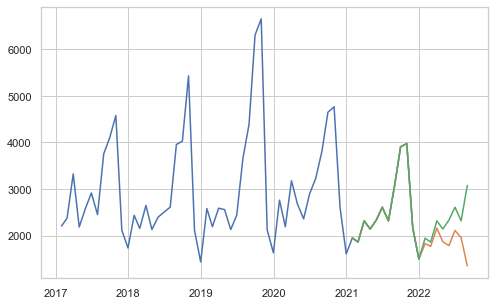

In [219]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
# plt.legend(loc = 'Left corner')
plt.show()

In [220]:
test

,Case Number
Date,
2021-01-31,1955
2021-02-28,1862
2021-03-31,2318
2021-04-30,2143
2021-05-31,2336
2021-06-30,2611
2021-07-31,2319
2021-08-31,3079
2021-09-30,3906


In [221]:
from sklearn.metrics import r2_score, rms
test['predicted_cas'] = prediction
r2_score(test['Case Number'], test['predicted_cas'])

0.5820862955758923

In [222]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test['Case Number'], test['predicted_cas'], squared=False)
rmse

435.05610037146675

In [230]:
month_newdf

,Case Number
Date,
2017-01-31,2206
2017-02-28,2377
2017-03-31,3326
2017-04-30,2186
2017-05-31,2581
2017-06-30,2916
2017-07-31,2453
2017-08-31,3755
2017-09-30,4100


In [231]:
# Forecast
arima_model.predict(n_periods=)

array([1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ,
       3906.        , 3976.        , 2166.        , 1498.        ,
       1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ,
       3906.        , 3976.        , 2166.        , 1498.        ,
       1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ,
       3906.        , 3976.        , 2166.        , 1498.        ,
       1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ,
       3906.        , 3976.        , 2166.        , 1498.        ,
       1947.42916376, 1862.        , 2318.        , 2143.        ,
       2336.        , 2611.        , 2319.        , 3079.        ,
       3906.        , 3976.        , 2166.        , 1498.     

In [54]:
df_by_day = df1.groupby(by=df1['Date'].dt.date).count()
df_by_day

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title,Date
Date,,,,,,,,,,,,,,,,,,,
2017-01-02,4,4,4,4,4,4,4,4,4,4,4,4,1,0,3,4,3,3,4
2017-01-03,84,84,84,84,84,84,84,83,84,83,84,84,25,1,30,74,27,26,84
2017-01-04,113,113,113,113,113,113,113,113,113,113,113,113,42,6,35,110,41,39,113
2017-01-05,106,106,106,106,106,106,106,104,106,104,106,106,33,5,39,101,35,33,106
2017-01-06,87,87,87,87,87,87,87,86,87,86,87,87,35,5,31,86,24,22,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-23,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1
2017-04-24,91,91,91,91,91,91,91,88,91,88,91,91,24,0,53,90,30,27,91
2017-04-25,91,91,91,91,91,91,91,91,91,91,91,91,27,2,45,91,35,34,91


In [50]:
fig = px.line(df_by_day, x=df_by_day.index, y="Case Number")
fig.show()

In [56]:
df1.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title,Date
0,204977,Efile Acceptance,2017-01-02,2017-01-03,Web,Medium,Tax Preparation,Efile,Platinum,We transmitted a Michigan return still have no...,Compliance,Returns / Reports,NaN,NaN,US.MI,Answer exists KB,041324813494120,How to understand the Transmission Monitor,2017-01-02
1,204979,Oregon STAT help: Previous Case 203787 Client ...,2017-01-02,2017-01-04,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client ...,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN,2017-01-02
2,204980,Data map incorrectly pulling in values,2017-01-02,2017-01-03,Web,Medium,Tax Preparation,Question / How To,Silver,Corptax Office Import - Credit Account imports...,Office - Excel Add-In,Import / Export,NaN,NaN,US,Answer exists KB,041414821333274,Corptax® Office - How to place an IF formula i...,2017-01-02
3,204981,The New Corptax Connect Website is not properl...,2017-01-02,2017-01-03,Web,High,Tax Preparation,Problem / Error,Silver,Searches can't be performed on the new system....,Websites,Connections (https://connect.corptax.com),Error Message,NaN,NaN,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wron...,2017-01-02
4,204986,LD400 is not reflecting a temporary adjustment,2017-01-03,2017-01-05,E-mail,Medium,Tax Preparation,Problem / Error,Platinum,LD400 is not reflecting a temporary adjustment,Compliance,Returns / Reports,NaN,NaN,US,Answer exists KB,041622907012748,Adjustments do not flow to LD400 workpaper and...,2017-01-03


In [ ]:
co = invoice.groupby('Invoice Date')['revenue'].sum().reset_index().set_index('Invoice Date').asfreq('M')

In [63]:
df1.groupby('Date')["Case Number"].count().reset_index().set_index('Date').asfreq('M')

,Case Number
Date,
2017-01-31,105
2017-02-28,123
2017-03-31,95


In [16]:
df.groupby(['SLA']).count().reset_index()

,SLA,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,Billable Support,2,2,2,2,2,2,2,2,2,1,1,0,0,0,2,0,0
1,Client Loss,175,175,175,175,175,175,175,174,172,175,175,129,89,22,171,19,19
2,Default,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
3,Gold,7426,7426,7426,7423,7426,7426,7426,7283,7290,7424,7421,2436,339,3918,7280,1848,1756
4,Platinum,45219,45219,45219,45214,45219,45219,45219,44523,44523,45195,45174,11944,1278,31241,44490,11449,11125
5,Silver,136326,136325,136326,136288,136326,136326,136324,133576,133663,136231,136164,32600,3376,86901,134136,38572,36950


In [17]:
df.groupby(['Product']).count().reset_index()

,Product,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,Application Hosting,3440,3440,3440,3440,3440,3440,3440,3376,3440,3378,3438,2455,238,644,3424,220,216
1,Calendar,768,768,768,768,768,768,768,747,768,748,768,104,0,277,763,309,297
2,Claims,57,57,57,57,57,57,57,57,57,57,57,0,0,3,56,8,8
3,Compliance,110216,110215,110216,110203,110216,110216,110216,108047,110201,108092,110191,14250,1903,86817,109191,33451,31987
4,Data Exchange Manager,570,570,570,570,570,570,570,560,570,559,568,4,0,133,566,89,79
5,International (US),28604,28604,28604,28583,28604,28604,28602,27940,28604,27971,28589,12364,24,13984,27972,9188,8967
6,ODBC Driver - Corptax,300,300,300,300,300,300,300,278,300,277,300,0,0,151,296,56,54
7,Office - Excel Add-In,3799,3799,3799,3797,3799,3799,3799,3705,3799,3708,3795,196,95,2155,3762,1177,1143
8,Other,798,798,798,798,798,798,798,748,797,772,795,203,14,251,767,96,91
9,Partnership / S Corp / Pass-Through,9069,9069,9069,9062,9069,9069,9069,8915,9068,8922,9062,567,24,8628,8992,2191,2101


In [ ]:

total_price = grp["revenue"].groupby(level=0, group_keys=False)
oo = total_price.nlargest(3)
ax = oo.plot(kind='bar',figsize=(20,8),rot=55 )

#draw lines and titles
count = oo.groupby("District").count()
cs = np.cumsum(count)
for i in range(len(count)):
    title = count.index.values[i]
    ax.axvline(cs[i]-.5, lw=0.8, color="k")
    ax.text(cs[i]-(count[i]+1)/2., 1.02, title, ha="center",
            transform=ax.get_xaxis_transform())

# shorten xticklabels
ax.set_xticklabels([l.get_text().split(", ")[1][:-1] for l in ax.get_xticklabels()])